# RANDOM FOREST

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. 

Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

LINK: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

Link For Algorithm: https://www.datacamp.com/community/tutorials/random-forests-classifier-python


Here the prediction can be done by classes Assigned, so it is supervised learning

Yes or No decisions will be given

In [8]:
#Import scikit-learn dataset library
from sklearn import datasets
import seaborn as sns

#Load dataset
iris = datasets.load_iris()

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)



['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Step-1 Creating Dataframe from dataset.

In [10]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


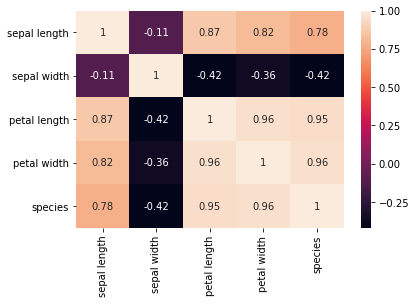

In [11]:
#just a correlated matrix.

correlation_matrix = data.corr().round(2)  # works for only dataframes.
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Step-2 Train and Test Data

 We  separate the columns into dependent and independent variables (or features and labels). 
 
Then we split those variables into a training and test set.

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Step-3 Check the accuracy using actual and predicted values.

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


# Checking prediction to single value

we can also make a prediction for a single item, for example:

sepal length = 3
sepal width = 5
petal length = 4
petal width = 2

ie, 

In [11]:
clf.predict([[3, 5, 4, 2]]) # this is prediction of individula data.

array([1])

Here, 1 indicates the flower type Setosa.

# Finding Important Features in Scikit-learn and Generating the Model.

Here, we are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:

First, you need to create a random forests model.

Second, use the feature importance variable to see feature importance scores.

Third, visualize these scores using the seaborn library.


# Step-1 create a random forests model.

In [13]:


from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Step-2    Feature importance scores
we use the feature importance variable to see feature importance scores.

In [14]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.446500
petal width (cm)     0.443274
sepal length (cm)    0.090275
sepal width (cm)     0.019951
dtype: float64

# Step-3  visualize these scores using the seaborn library

We can also visualize the feature importance. Visualizations are easy to understand and interpretable.

For visualization, you can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.

No handles with labels found to put in legend.


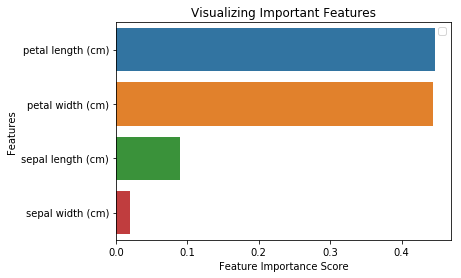

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


# Step-4 Generating the Model on Selected Features

Here, we can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [16]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

E:\datasciencepandasudemy\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


After spliting, you will generate a model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values.

wecan see that after removing the least important features (sepal length), the accuracy increased. 

This is because you removed misleading data and noise, resulting in an increased accuracy. 

A lesser amount of features also reduces the training time.

In [17]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


We have learned what random forests is, how it works, finding important features, the comparison between random forests and decision trees, advantages and disadvantages. 

You have also learned model building, evaluation and finding important features in scikit-learn.